## Get data from Meetup.com

We are going to get data from Meetup's API. You can create custom requests using their API console, then make them via Python by copying the secure link here.

https://secure.meetup.com/meetup_api/console/?path=/2/members

In [1]:
import pandas as pd
import numpy as np
import requests
import os

os.getcwd()

members = pd.read_csv('data_members.csv')
edges = pd.read_csv('data_edges.csv')

#### Get PyNash Members

In [5]:
members = pd.DataFrame()

for page in np.arange(10):
    q = 'https://api.meetup.com/2/members?offset={}&format=json&group_urlname=PyNash&page=200&key=1eb16676d664fa48314391ae5b6c'.format(page)
    response = requests.get(q).json()
    if len(response['results']) > 0:
        tdf = pd.DataFrame.from_dict(response['results']).set_index('id')
        members = members.append(tdf)
    else: 
        continue
    
members = members[['name', 'city',  'state', 'hometown', 'joined',  'visited', 'lat', 'lon']] # 'topics' might also be of interest

# Write to computer
write_data = True
if write_data == True:
    members.to_csv('data_members.csv', encoding='utf-8') 
    
print('There are {} members in the PyNash MeetUp group.'.format(members.shape[0]))

There are 1433 members in the PyNash MeetUp group.


#### Get memberships for each member

In [27]:
from time import sleep
import json


edges = pd.DataFrame()
err_ids = []
for pid in members.index:
    r = requests.get('https://api.meetup.com/2/groups?&sign=true&member_id={}&page=200&key=1eb16676d664fa48314391ae5b6c'.format(pid))
    try:
        r = r.json()
        for membership in r['results']:
            edge = pd.Series({'member_id': pid, 
                              'group_id': membership['id'], 
                              'group_name': membership['name']})
            edges = edges.append(edge, ignore_index=True)
    except json.decoder.JSONDecodeError:
        print(pid)
        err_ids.append(pid)
    
    # Sleep briefly so that API doesn't get overwhelmed
    sleep(0.2)
        

# Write to computer
write_data = True
if write_data == True:
    edges.to_csv('data_edges.csv') 


In [28]:
edges.shape

(18269, 3)

In [46]:
import networkx as nx

g = nx.from_edgelist(edges[['member_id', 'group_name']].values)


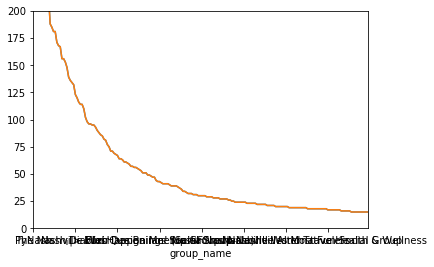

In [33]:
edges.groupby('group_name').size().sort_values(ascending=False).iloc[0:200].plot()
plt.ylim([0,200])
plt.show()

In [ ]:
import matplotlib.pyplot as plt


In [60]:
nx.bipartite.weighted_projected_graph?

In [61]:
mg = nx.bipartite.weighted_projected_graph(g, m, ratio=True)

In [66]:
mg.edges(data=True)[0:30]

[(208228352, 217464856, {'weight': 0.0014964459408903852}),
 (208228352, 199385114, {'weight': 0.0003741114852225963}),
 (208228352, 230875172, {'weight': 0.0007482229704451926}),
 (208228352, 18595881, {'weight': 0.0003741114852225963}),
 (208228352, 158212142, {'weight': 0.0003741114852225963}),
 (208228352, 71327802, {'weight': 0.0003741114852225963}),
 (208228352, 160636992, {'weight': 0.0003741114852225963}),
 (208228352, 219275333, {'weight': 0.0007482229704451926}),
 (208228352, 86024262, {'weight': 0.0003741114852225963}),
 (208228352, 217825368, {'weight': 0.0003741114852225963}),
 (208228352, 222543963, {'weight': 0.0003741114852225963}),
 (208228352, 182992991, {'weight': 0.0007482229704451926}),
 (208228352, 53788772, {'weight': 0.0003741114852225963}),
 (208228352, 190021732, {'weight': 0.0003741114852225963}),
 (208228352, 6160486, {'weight': 0.0003741114852225963}),
 (208228352, 188219505, {'weight': 0.0003741114852225963}),
 (208228352, 219201662, {'weight': 0.001122334

In [84]:
np.median(edge_weights)

0.00037411148522259631

In [86]:
thresh = 0.00037411148522259631
edge_weights = [(u,v) for u,v,d in mg.edges(data=True) if d['weight'] > thresh]

plt.hist(edge_weights, bins=100)
plt.xlim([0,0.005])
plt.show()

KeyboardInterrupt: 

In [88]:
mg

[(208228352, 217464856),
 (208228352, 230875172),
 (208228352, 219275333),
 (208228352, 182992991),
 (208228352, 219201662),
 (208228352, 199327908),
 (208228352, 219758760),
 (208228352, 129122472),
 (208228352, 224837802),
 (208228352, 217309361),
 (208228352, 218816696),
 (208228352, 208429247),
 (208228352, 138764482),
 (208228352, 215531726),
 (208228352, 231522514),
 (208228352, 207118547),
 (208228352, 222617819),
 (208228352, 102695132),
 (208228352, 218472693),
 (208228352, 59916552),
 (208228352, 183378188),
 (208228352, 183345433),
 (208228352, 211271973),
 (208228352, 11288886),
 (208228352, 207053119),
 (208228352, 209281350),
 (208228352, 235823431),
 (208228352, 45597012),
 (208228352, 135733652),
 (208228352, 4211111),
 (208228352, 221381045),
 (208228352, 187613627),
 (208228352, 230441418),
 (208228352, 214761951),
 (208228352, 236437985),
 (208228352, 208732641),
 (208228352, 105538032),
 (208228352, 203457014),
 (208228352, 183845401),
 (208228352, 233275939),
 (208

In [87]:
plt.spy(nx.adjacency_matrix(mg[edge_weights]))
plt.show()

TypeError: unhashable type: 'list'

In [55]:
#l = nx.spring_layout(mg)

nx.draw_networkx(mg, layout=l)
plt.show()

KeyboardInterrupt: 

In [45]:
nx.is_bipartite(g)

AttributeError: 'set' object has no attribute 'is_directed'

In [41]:
mat = nx.bipartite.biadjacency_matrix(g, row_order=all_nodes)
plt.spy(mat)
plt.show()

AttributeError: 'set' object has no attribute 'number_of_edges'

In [20]:
all_nodes = edges.member_id.unique().tolist() + edges.group_name.unique().tolist()

node_classes = dict([(k, 'member') if k in edges.member_id.unique().tolist() else (k, 'group') for k in all_nodes])
nx.set_node_attributes(g, 'class', node_classes)

In [38]:
m, g = nx.bipartite.sets(g)
nx.bipartite.color(g)

AttributeError: 'set' object has no attribute 'is_directed'

In [9]:

plt.imshow()
plt.show()

TypeError: Image data can not convert to float

In [89]:
    r = requests.get('https://api.meetup.com/2/groups?&sign=true&member_id={}&page=200&key=1eb16676d664fa48314391ae5b6c'.format(pid))


In [64]:
for member in response_from_meetup.json()['results']:
    try:
        print(member[''])
    except:
        pass

Jamie
Jamie Isabel
Jan Van Zeghbroeck
Jana Black
Jaquelin
Jared Bunting
Jared Cleghorn
Jared Edwards
Jared Fuller
Jarrod Smith
Jarvis Stubblefield
Jason
Jason Bates
Jason Bynum
Jason Bynum
Jason Cater
Jason K.
Jason Myers
Jason Orendorff
Jason Schuster
Jason Scott
Jason Smith
jason w
Jason Weaver
Jay H
Jay Maul
Jayme Kolling
Jayson Rich
JB
JC Hwang
Jean SÃ¶derkvist
Jeff Bauer
Jeff Bowen
Jeff Collins
Jeff Deskins
Jeff Finley
Jeff Hammond
Jeff Kuykendall
Jeff Lockwood
Jeffrey Druin
Jenese McCarroll
Jenkinsharold26
Jennie M
Jennifer
Jerad Clifford
Jeremiah Cundiff
Jeremiah Mathis
Jeremy
Jeremy C. Swain
Jeremy Estrada
Jeremy Phelps
Jeremy Pitt
Jeremy Wink
Jeremy Young
Jerome Duran
Jerry Baker
Jess Short
Jesse
Jesse Ford
Jesse Keogh
Jessica
Jessica 
Jessica Whitman
Jessica Wynn
Jessica Younker
Jessie Valentino
Jim Adkins
Jim Fuqua
Jim V
Jingsai Liang
Jingtian Fang
Jiovanni
jloftis
jlsnyder08
Jmead4
JoAnn Alvarez
Joanne Eckton
Jody Sumner
Joe Drury
Joe Hatcher
Joe Hills
Joe Morris
Joe Philli

In [8]:
from pprint import pprint
pprint(response_from_meetup.content[0])

123


In [16]:
import json
import urllib3

data = json.scanner(response_from_meetup.text)

TypeError: 'module' object is not callable